In [1]:
import pandas as pd
import statsmodels.api as sm
from IPython.display import display

# Leggo AmesHousing.csv e lo metto nel dataframe df:
# ogni riga    -> una casa
# ogni colonna -> una variabile
df = pd.read_csv("AmesHousing.csv")
display(df)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [2]:
# Il prezzo di vendita della casingola casa (y) è
# la mia variabile target (la variabile dipendente)
y = df["SalePrice"]

# regressors è una lista di nomi di colonne che voglio usare come regressori nel modello,
# scelti tra le 82 variabili disponibili nel dataset
# prime 8  -> variabili numeriche:
#             1. area
#             2. qualità
#             3. condizione
#             4. anno costruzione
#             5. area seminterrato
#             6. posti auto garage
#             7. area garage
#             8. area lotto
# ultime 4 -> variabili categoriche:
#              9. stile casa
#             10. quartiere
#             11. aria condizionata
#             12. qualità cucina
regressors = [
    "Gr Liv Area",
    "Overall Qual",
    "Overall Cond",
    "Year Built",
    "Total Bsmt SF",
    "Garage Cars",
    "Garage Area",
    "Lot Area",
    "House Style",
    "Neighborhood",
    "Central Air",
    "Kitchen Qual",
]

# display df sui 12 regressori scelti
display(df[regressors])

,Gr Liv Area,Overall Qual,Overall Cond,Year Built,Total Bsmt SF,Garage Cars,Garage Area,Lot Area,House Style,Neighborhood,Central Air,Kitchen Qual
0,1656,6,5,1960,1080.0,2.0,528.0,31770,1Story,NAmes,Y,TA
1,896,5,6,1961,882.0,1.0,730.0,11622,1Story,NAmes,Y,TA
2,1329,6,6,1958,1329.0,1.0,312.0,14267,1Story,NAmes,Y,Gd
3,2110,7,5,1968,2110.0,2.0,522.0,11160,1Story,NAmes,Y,Ex
4,1629,5,5,1997,928.0,2.0,482.0,13830,2Story,Gilbert,Y,TA
...,...,...,...,...,...,...,...,...,...,...,...,...
2925,1003,6,6,1984,1003.0,2.0,588.0,7937,SLvl,Mitchel,Y,TA
2926,902,5,5,1983,864.0,2.0,484.0,8885,1Story,Mitchel,Y,TA
2927,970,5,5,1992,912.0,0.0,0.0,10441,SFoyer,Mitchel,Y,TA
2928,1389,5,5,1974,1389.0,2.0,418.0,10010,1Story,Mitchel,Y,TA


`.fit()` usa l’algoritmo dei *minimi quadrati ordinari* (OLS) per stimare i coefficienti della regressione lineare.<br>
Dato il modello:

$$
y = X\beta + \varepsilon
$$

dove:
- $y$ è la variabile dipendente
- $X$ è la matrice dei regressori (inclusa l’intercetta)
- $\beta$ sono i coefficienti da stimare
- $\varepsilon$ sono gli errori

Per ogni osservazione i-esima:

$$
\varepsilon_i = y_i - \hat{y}_i
$$
$$
\varepsilon_i = y_i - (x_i^\top \hat{\beta})
$$

OLS cerca i coefficienti $\hat{\beta}$ che rendono i residui il più piccoli possibile.<br>
Il criterio da minimizzare è la *somma dei quadrati dei residui* (SSR):

$$
SSR(\beta) = \sum_{i=1}^n (y_i - x_i^\top \beta)^2
$$

Vengono usati i quadrati perchè:

- i residui negativi non si cancellano con quelli positivi,
- i residui grandi vengono penalizzati molto di più,
- la funzione è derivabile e ha una soluzione chiusa.

Minimizzando poi SSR rispetto a $\beta$ si ottiene l’equazione normale:

$$
X^\top X \hat{\beta} = X^\top y
$$

da cui:

$$
\hat{\beta} = (X^\top X)^{-1} X^\top y
$$

Quindi cosa fa `.fit()` in pratica:
1. costruisce $X^\top X$
2. verifica che sia invertibile
3. calcola $(X^\top X)^{-1} X^\top y$
4. ottiene $\hat{\beta}$
5. calcola:
    - residui
    - $R^2$ e $adj\text{-}R^2$
    - deviazioni standard
    - t-statistiche e p-value
    - intervalli di confidenza
    - test di diagnostica


In [3]:
# X è un nuovo DataFrame che contiene solo le colonne elencate in regressors
X = df[regressors]

# Mi creo le dummies per le variabili categoriche:
# get_dummies trasforma le variabili categoriche (stringhe) in un insieme di dummy binarie
# "Neighborhood" -> ["Neighborhood_Blueste", "Neighborhood_BrDale", ...]
# "House Style"  -> ["House Style_1.5Unf", "House Style_1Story", ...]
# "Kitchen Qual" -> ["Kitchen Qual_Fa", "Kitchen Qual_Gd", ...]
# ...
# Per ciascuna variabile categorica, drop_first=True ordina la lista di dummies e ne elimina la prima per evitare
# la dummy trap (multicollinearità perfetta tra le dummies), lascia poi le variabili numeriche invariate
X = pd.get_dummies(X, drop_first=True)

# print tattico
# print(X.columns.tolist())

# forzo tutte le colonne di X e y a essere numeriche
# errors="coerce" trasforma tutto ciò che non è convertibile in numero
# (stringa strana, spazio vuoto, simbolo) in NaN
X = X.apply(pd.to_numeric, errors="coerce")
y = pd.to_numeric(y, errors="coerce")

# Combino la colonna di y e tutte le colonne di X in un unico DataFrame
# Poi con dropna() elimino tutte le righe che contengono almeno un NaN in una qualsiasi colonna:
# se manca "SalePrice", "Gr Liv Area", una delle dummy, una stringa diventata NaN nella conversione
# | y  | x1 | x2 | ... |
# |----|----|----|-----|
# | ** | ** | ** | ... |
# | ** | ** | ** | ... |
data = pd.concat([y, X], axis=1).dropna()

# separo di nuovo y e X ma con NumPy

# prendo la colonna SalePrice (y) dal DataFrame pulito e lo converto in un array NumPy di float -> y_clean: vettore n*1
# prendo tutte le restanti colonne e le converto in un array NumPy di float                     -> X_clean: matrice n*k
y_clean = data["SalePrice"].to_numpy(dtype=float)
X_clean = data.drop(columns=["SalePrice"]).to_numpy(dtype=float)

# Aggiungo una colonna di 1 alla matrice (l'intercetta b_0)
X_clean = sm.add_constant(X_clean)

# Creo l’oggetto OLS e con fit() eseguo la stima dei coefficienti b^
# minimizzando la somma dei quadrati dei residui:
# dato y = Xb + e, cerca i valori di b^ che rendono i residui più piccoli possibile
model = sm.OLS(y_clean, X_clean).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     362.1
Date:                Tue, 18 Nov 2025   Prob (F-statistic):               0.00
Time:                        23:20:58   Log-Likelihood:                -34377.
No. Observations:                2928   AIC:                         6.885e+04
Df Residuals:                    2880   BIC:                         6.914e+04
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.737e+05   9.32e+04     -8.299      0.0

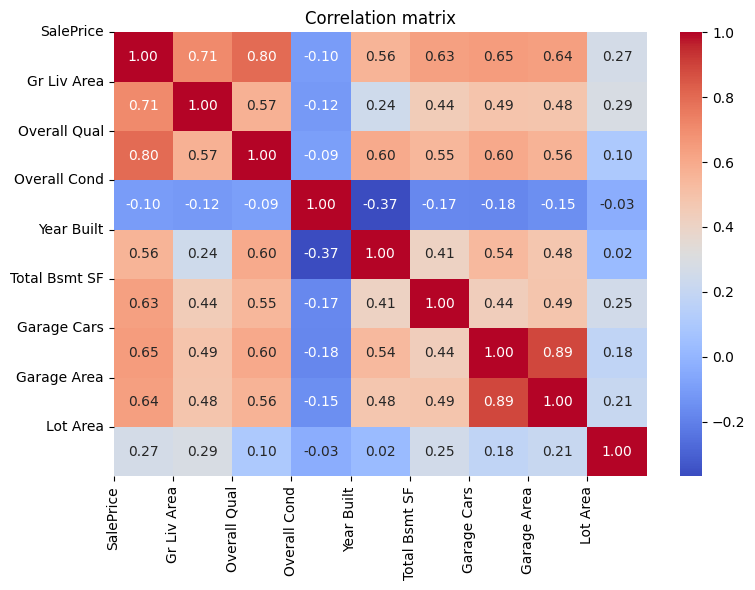

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# seleziono solo le colonne numeriche rilevanti
num_vars = [
    "SalePrice",
    "Gr Liv Area",
    "Overall Qual",
    "Overall Cond",
    "Year Built",
    "Total Bsmt SF",
    "Garage Cars",
    "Garage Area",
    "Lot Area",
]

corr = df[num_vars].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")

# colormap dafault
# im = plt.imshow(corr, vmin=-1, vmax=1)

plt.xticks(np.arange(len(num_vars)), num_vars, rotation=90)
plt.yticks(np.arange(len(num_vars)), num_vars)

# barra dei colori (da usare con la colormap)
# plt.colorbar(im, fraction=0.046, pad=0.04)

plt.title("Correlation matrix")
plt.tight_layout()
plt.show()